In [1]:
import numpy as np
import pandas as pd
import json
from natsort import natsorted
import os
from json import JSONEncoder
import matplotlib.pyplot as plt

In [2]:
MAXNUM=10000
movies=pd.read_csv('imdb (1000 movies) in june 2022.csv')[:MAXNUM]
names=movies['movie name\r\n']
imagenames=natsorted(os.listdir('1000movies/'))[:MAXNUM]
simmatrix=np.load('moivieSimilarity.npy')[:MAXNUM,:MAXNUM]

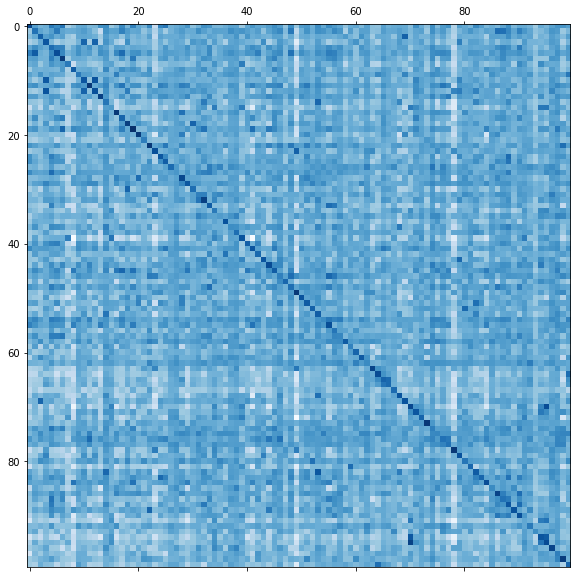

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(simmatrix[:100,:100], cmap=plt.cm.Blues)

In [33]:
class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

#numpyArrayOne = numpy.array([[11, 22, 33], [44, 55, 66], [77, 88, 99]])

# Serialization
numpyData = {"similarity": simmatrix}

In [38]:
with open('diffgamehtml/js/similaritytable.json','w') as f:
    json.dump(numpyData,f,cls=NumpyArrayEncoder)

In [22]:
pd.DataFrame(simmatrix).to_json('diffgamehtml/js/similaritytable.json')

In [17]:
movies['movie name\r\n'].to_json('diffgamehtml/js/movieslist.json')